In [7]:
import numpy
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt

In [8]:
fullevent_data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")

In [28]:
list(set(fullevent_data.TeamID) - {'Huskies'})

['Opponent12',
 'Opponent16',
 'Opponent17',
 'Opponent6',
 'Opponent3',
 'Opponent9',
 'Opponent18',
 'Opponent15',
 'Opponent10',
 'Opponent1',
 'Opponent4',
 'Opponent13',
 'Opponent2',
 'Opponent7',
 'Opponent14',
 'Opponent19',
 'Opponent5',
 'Opponent8',
 'Opponent11']

In [10]:
pfed = fullevent_data.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]
pfed = pfed[pfed['MatchID']==1][pfed['TeamID'].isin(list(set(fullevent_data.TeamID) - {'Huskies'}))]

In [11]:
pfed = pfed.reset_index()
pfed = pfed.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]

In [12]:
last_1H = max(pfed[pfed['MatchPeriod']=='1H'].EventTime)

fed_2H = pfed[pfed['MatchPeriod']=='2H']
fed_2H['EventTime'] += last_1H

pfed = pd.concat([pfed[pfed['MatchPeriod']=='1H'], fed_2H])

In [13]:
pfed

,MatchID,TeamID,MatchPeriod,EventTime,EventType,EventSubType
0,1,Opponent1,1H,33.730326,Duel,Air duel
1,1,Opponent1,1H,42.611028,Free Kick,Throw in
2,1,Opponent1,1H,47.213716,Duel,Ground loose ball duel
3,1,Opponent1,1H,48.487897,Pass,Simple pass
4,1,Opponent1,1H,50.109404,Duel,Ground loose ball duel
...,...,...,...,...,...,...
652,1,Opponent1,2H,5697.601290,Duel,Air duel
653,1,Opponent1,2H,5697.755548,Duel,Ground loose ball duel
654,1,Opponent1,2H,5701.244976,Duel,Ground loose ball duel
655,1,Opponent1,2H,5704.923931,Foul,Foul


In [14]:
points = [0]

In [15]:
points.append(min(pfed[pfed['MatchPeriod']=='2H'].index))

In [16]:
sindex = list(pfed[pfed['EventType']=='Substitution'].index)

for p in sindex:
    points.append(p)

In [17]:
points.append(max(pfed.index))

In [18]:
points = list(set(points))
points = sorted(points)

In [19]:
points

[0, 297, 469, 470, 656]

In [20]:
time_points = []

In [21]:
for i in range(len(points)-1):
    start_time = pfed.iloc[points[i]].EventTime
    end_time = pfed.iloc[points[i+1]].EventTime
    print(start_time, end_time)
    # time_points.append(start_time)

    duration = end_time - start_time
    num_points = ceil(duration / 360)
    if num_points <= 0:
        continue
    sub_quantum = duration / num_points

    while start_time < end_time:
        time_points.append(start_time)
        start_time += sub_quantum

time_points.append(pfed.iloc[points[-1]].EventTime)

33.73032599999999 2819.382953
2819.382953 4430.221212
4430.221212 4430.221212
4430.221212 5757.107459000001


In [22]:
time_points

[33.73032599999999,
 381.936904375,
 730.14348275,
 1078.350061125,
 1426.5566394999998,
 1774.7632178749998,
 2122.96979625,
 2471.176374625,
 2819.382953,
 3141.5506047999997,
 3463.7182565999997,
 3785.8859083999996,
 4108.0535602,
 4430.221212,
 4761.942773750001,
 5093.6643355000015,
 5425.385897250002,
 5757.107459000001]

In [23]:
set(pfed[pfed.EventTime >= time_points[0]][pfed.EventTime < time_points[1]].EventType)

{'Duel', 'Free Kick', 'Others on the ball', 'Pass'}

In [24]:
num_types = []

for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    sub_fed = pfed[pfed.EventTime >= start_time][pfed.EventTime < end_time]
    types_set = set(sub_fed.EventType) | set(sub_fed.EventSubType)
    num_types.append(len(types_set))

In [25]:
num_type_avg = np.mean(num_types)

In [26]:
points_avg = [num_type_avg] * len(num_types)

Text(0, 0.5, 'Number of types')

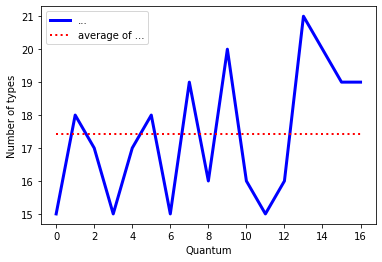

In [27]:
plt.plot(num_types, color='b', linewidth=3, label='...')
plt.plot(points_avg, color='r', linewidth=2, linestyle=':', label='average of ...')
plt.legend(loc=2)
plt.xlabel('Quantum')
plt.ylabel('Number of types')